# 5. Finance Fundamentals

Overview of contents:
- 5.1 Portfolio and Shape Ratio
- 5.2 Portfolio Optimization
- 5.3 Financial Tools
- 5.4 CAMP Model
- 5.5 Value of a Company

## 5.1 Portfolio and Sharpe Ratio

In a portfolio, given a total investment amount, it is allocated for different assets, such that each asset has a percent value of the total investment in the portfolio.

Key statistics of a portfolio:
- Daily return
- Cumulative return: amount returned after an entire period of time
- Avg. daily return: mean of daily returns
- Std. dev. of daily return = Volatility of the return
- **Sharpe ratio**


### Sharpe Ratio

The Sharpe ratio relates the mean daily return and the volatility (variance or standard deviation). That way, we can compute the **risk-adjusted return**.

$S = \frac{R_p - R_f}{\sigma_p}$

- $R_p$: expected portfolio return
- $R_f$: risk-free return: return we would have had if we had put our money in an investment such as savings account, LIBOR, or treasury bonds that are essentially risk free. In the USA in 2017 that interest rate is almost 0%, so that is the one used in the course. However, it is expected that the FED will increase the interest return in the future.
- $\sigma_p$: portfolio standard deviation

So, the higher $S$ the better, because we'd have high returns with low volatility!

William Sharpe (Nobel laureate) originally presented the formula for **yearly returns**: mean daily returns and std. dev. of the whole year. However, we deal often with daily, weekly and monthly sampling series, thus the **anualized Sharpe ratio** is defined:

`ASR = k * SR`

k = 
- `sqrt(252)` for daily sampling series
- `sqrt(52)` for weekly sampling series
- `sqrt(12)` for monthly sampling series

Annualized Sharpe Ratio (ASR) values:
- 1: go-to for investors
- 2: very good
- 3: excellent


### Portfolio Allocation: Initial Guess

In [4]:
import pandas as pd
import numpy as np
import quandl

In [5]:
# Load Quandl API key obtained from quandl.com and saved into a TXT file (local)
# Make sure TXT file is only locally: add it to .gitignore to avoid uploading it!
key_file = open('../quandl_api_key.txt')
lines = key_file.readlines()
key = lines[0].split('\n')[0]
quandl.ApiConfig.api_key = key

In [6]:
# Define start and end dates
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [7]:
# Get stock data.
# 11: Adjusted Close
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [8]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [9]:
# Value os stock on first day
aapl.iloc[0]['Adj. Close']

52.848786580038

In [10]:
# We create a new column: Normed return:
# Cummulative return ratio wrt first day value
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [11]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [12]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [13]:
# Portfolio allocation
# We start with a fixed allocation
# and plot how our investment would have evolved
# 30% Apple
# 20% Cisco
# 40% Amazon
# 10% IBM

In [14]:
# Cummulative return ratio * allocation %
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [15]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [16]:
# Now we select an investment amount
# and compute its distribution and development
totalInvestment = 1000000
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*totalInvestment

In [17]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [18]:
# We create a single dataframe
# which contains all position values
all_pos_vals = [aapl['Position Values'],
               cisco['Position Values'],
               ibm['Position Values'],
               amzn['Position Values']]

In [19]:
portfolio_val = pd.concat(all_pos_vals,axis=1)

In [20]:
portfolio_val.columns = ['AAPL', 'CISCO', 'IBM', 'AMZN']

In [21]:
# Total portfolio position value
portfolio_val['Total Position'] = portfolio_val.sum(axis = 1)

In [22]:
portfolio_val.head()

,AAPL,CISCO,IBM,AMZN,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [23]:
portfolio_val.tail()

,AAPL,CISCO,IBM,AMZN,Total Position
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

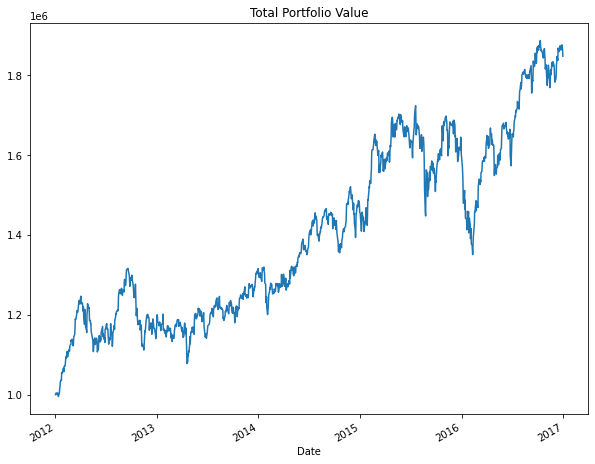

In [25]:
# Total portfolio value development
portfolio_val['Total Position'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

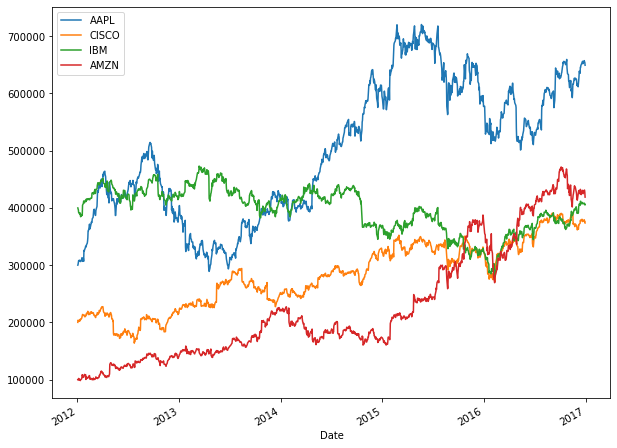

In [26]:
# Value development of single portfolio stocks
portfolio_val.drop('Total Position',axis=1).plot(figsize=(10,8))

### Portfolio Allocation: Sharpe Ratio Computation

In [27]:
portfolio_val.head()

,AAPL,CISCO,IBM,AMZN,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [28]:
# Daily returns: (r(t)-r(t-1))/r(t-1)
# We can also compute it with .pct_change()
portfolio_val['Daily Return'] = portfolio_val['Total Position'].pct_change(1)

In [29]:
portfolio_val.head()

,AAPL,CISCO,IBM,AMZN,Total Position,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [30]:
# Average daily return
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [31]:
# Standard deviation of daily return
portfolio_val['Daily Return'].std()

0.010568287769161725

<AxesSubplot:ylabel='Frequency'>

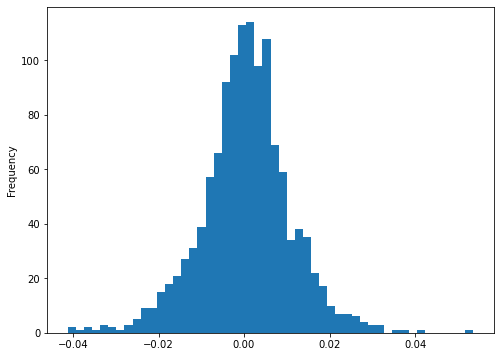

In [32]:
# Plot histogram of daily returns, always a good idea
portfolio_val['Daily Return'].plot(kind='hist',bins=50,figsize=(8,6))

In [33]:
# Cumulative return: pct of change in last/current value wrt first value
cumulative_return = 100 * (portfolio_val['Total Position'][-1]/portfolio_val['Total Position'][0] - 1)

In [34]:
cumulative_return

84.74285181665545

In [35]:
# We compute the Sharpe ratio: risk adjusted return
# We compute it assuming risk-free return to be 0,
# because the FED has close to zero interest rates at the moment 
RF = 0
SR = (portfolio_val['Daily Return'].mean() - RF)/portfolio_val['Daily Return'].std()

In [36]:
SR

0.05149680662648089

In [37]:
# However, we need to compute the annualized Sharpe ratio
# Since we have daily data, we need to apply the daily factor
f = (252**0.5)
ASR = f * SR

In [38]:
# We get our ASR, which is smaller than 1
ASR

0.817486461885909

## 5.2 Portfolio Optimization

We are going to perform a **Monte Carlo Simulation**: we guess random allocation ratios and compute their Annualized Sharpe Ratio (ASR); the allocation with the best ASR wins. We plot a 2D/3D diagram: volatility, return, SR (encoded in colors). The result is a bullet-like plot which has an **efficient frontier** where the optimum allocation lies. It is possible to find the optimum point with minimization technique on the values along the frontier. This method is called the **Markowitz** portfolio optimization.

### Monter Carlo Simulation

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
aapl = pd.read_csv('../data/AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('../data/CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('../data/IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('../data/AMZN_CLOSE',index_col='Date',parse_dates=True)

In [41]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['AAPL','CISCO','IBM','AMZN']

In [42]:
stocks.head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [43]:
# Mean daily returns
stocks.pct_change(1).mean()

AAPL     0.000750
CISCO    0.000599
IBM      0.000081
AMZN     0.001328
dtype: float64

In [44]:
# Correlation of daily returns
# Necessary for pairs-trading
stocks.pct_change(1).corr()

,AAPL,CISCO,IBM,AMZN
AAPL,1.000000,0.301990,0.297498,0.235487
CISCO,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
AMZN,0.235487,0.284470,0.258492,1.000000


In [45]:
# Logarithmic vs arithmetic returns:
# In most cases any of them (both) can be used
# but in some cases log returns are necessary
# for de-trending or normalizing the time series.
# Therefore, it is recommended using log returns!

In [46]:
# Logarithmic returns
log_ret = np.log(stocks/stocks.shift(1))

In [47]:
# We see that the values are very similar to the arithmetic
# because we are dealing with low numbers
log_ret.head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


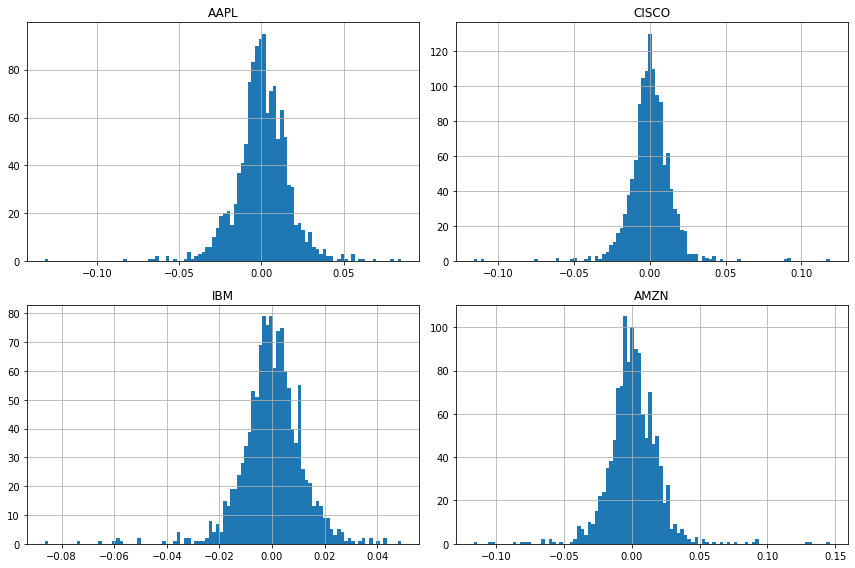

In [48]:
# Plot histograms of log returns
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [49]:
# Arithmetic mean of log returns
log_ret.mean()

AAPL     0.000614
CISCO    0.000497
IBM      0.000011
AMZN     0.001139
dtype: float64

In [50]:
# Covariance
log_ret.cov()

,AAPL,CISCO,IBM,AMZN
AAPL,0.000271,0.000071,0.000057,0.000075
CISCO,0.000071,0.000204,0.000072,0.000079
IBM,0.000057,0.000072,0.000140,0.000059
AMZN,0.000075,0.000079,0.000059,0.000375


In [65]:
# Random weights = allocation ratios
np.random.seed(101)
weights = np.array(np.random.random(4))
weights /= weights.sum()
print(stocks.columns)
print(weights)

Index(['AAPL', 'CISCO', 'IBM', 'AMZN'], dtype='object')
[0.40122278 0.44338777 0.02212343 0.13326603]


In [66]:
# For those weights, we have the following Sharpe ratio
# The idea is to repeat this code thousands of times!
#
# Expected portfolio return
expected_ret = np.sum((log_ret.mean()*weights)*252)
# Expected volatility: sqrt(w*C*w)
expected_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
# Sharpe Ratio
RF = 0.0
SR = (expected_ret-RF) / expected_vol

In [67]:
SR

0.8430831483926045

In [71]:
# We run the previous code in a for loop 500 times
num_portfolios = 5000
all_weights = np.zeros((num_portfolios,len(stocks.columns)))
ret_array = np.zeros(num_portfolios)
vol_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)
for i in range(num_portfolios):
    # Weights
    weights = np.array(np.random.random(4))
    weights /= weights.sum()
    all_weights[i,:] = weights
    # Expected return (annual)
    ret_array[i] = np.sum((log_ret.mean()*weights)*252)
    # Expected volatility (annual)
    vol_array[i] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    # Sharpe ratio
    RF = 0.0
    sharpe_array[i] = (ret_array[i]-RF) / vol_array[i]

In [72]:
# Maximum Sharpe Ratio in our simulation
# It is 1.03: ok, but not really good
sharpe_array.max()

1.030326055127108

In [73]:
# Index of the maximum SR
sharpe_array.argmax()

1409

In [98]:
# Weights/Allocation ratios of maxium SR
# We see that we would require
# half on AMZN, no IBM, and rest (AAPL, CISCO) divided quite equally
all_weights[sharpe_array.argmax()]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

Text(0, 0.5, 'Return')

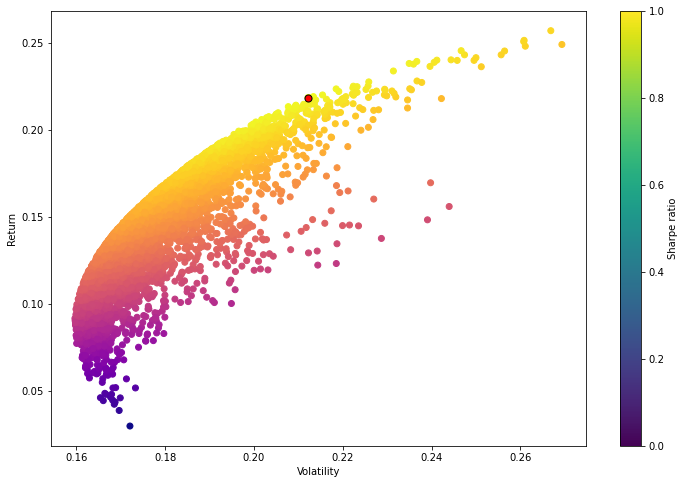

In [80]:
# Plot results
# We see that the maximum point is a tangent poin tof the efficient frontier
# The efficient frontier is the set of points thatlead to
# maximum returns for a given volatility
# If we move right: we have the same returns for higher volatility
# If we move down: we have less returns for the same volatility
# In general, we want the highest returns possible for the lowest volatility
# 
plt.figure(figsize=(12,8))
# All points
plt.scatter(vol_array,ret_array,c=sharpe_array,cmap='plasma')
# Max SR point
plt.scatter(vol_array[sharpe_array.argmax()],ret_array[sharpe_array.argmax()],c='red',s=50,edgecolors='black')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

### Anlytical Optmization instead of Morte Carlo Simulation: Markowitz Optimization

Instead of running a simulation with randomly sampled points (Monte Carlo), we can use an optimizer. That is possible, among others, because we have a clear frontier. We use `scipy` for the optimization.

In [81]:
# We want to optimize our function which, given weights,
# yields the (max.) sharpe ratio
# We define that function
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum((log_ret.mean()*weights)*252)
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    RF = 0.0
    sr = (ret-RF) / vol
    return np.array([ret,vol,sr])

In [83]:
# Scipy has a minimize module, which is the inverse of maximize (our case)
from scipy.optimize import minimize

In [85]:
#help(minimize)

In [86]:
# Since we minimize, we need to create an auxiliary function
# which returns the negative of the SR using the previous function get_ret_vol_sr
def neg_sr(weights):
    return (-1.0)*get_ret_vol_sr(weights)[2]

In [87]:
# We need to define the constraints
# Example: weights need to add up to 1
# scipy.optimize needs functions which return 0 if constraint is fullfilled
def check_sum(weights):
    # return 0 if sum(weights) == 1, else, difference
    return np.sum(weights) - 1

In [88]:
# Constraints variable: tuple with dictionaries inside
cons = ({'type':'eq','fun':check_sum})

In [89]:
# Bounds of the weights
bounds = ((0,1),(0,1),(0,1),(0,1))

In [90]:
# Initial guess: usually an even allocation is the best option
init_guess = [0.25,0.25,0.25,0.25]

In [92]:
# We put everything into the minimizer
# There are many methods, we choose the recommended for easy tasls as ours: Sequential Least Squares
opt_results = minimize(neg_sr,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [95]:
# The returned object contains many information pieces
opt_results

     fun: -1.0307168703354168
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418982, 0.        , 0.52952041])

In [96]:
# The actual result (weights for minimum neg_sr) is in .x
# We get a similar set of weights 
opt_results.x

array([0.26628977, 0.20418982, 0.        , 0.52952041])

In [97]:
# We query now the returns, volatility and SR for those optimim weights
# Again, the best SR is 1.03: ok, but not excellent
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [103]:
# We can create the efficient frontier
# x: Volatility, y: Return
# For a given x/y, we optimize y/x
# We optimize the volatility value (x) for every return value (y)
# In our previous plot, volatility values go from 0 to 0.3 aprox.
frontier_y = np.linspace(0,0.3,100)

In [102]:
def volatility(weights):
    # get volatility
    return get_ret_vol_sr(weights)[1]

In [105]:
# With optimization, we create the curve (frontier_volatility,frontier_y)
# Which is theefficient frontier that maps optimum return and volatility
frontier_volatility = []
for possible_return in frontier_y:
    # New constraint: the weights must yield the possible return at each iteration
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    # All other parameters are the same as before
    result = minimize(volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    # The result function value (volatility) is stored
    frontier_volatility.append(result['fun'])

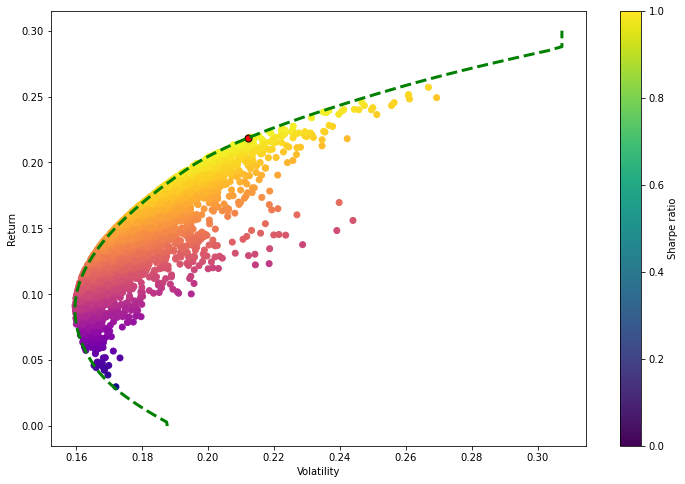

In [106]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array,ret_array,c=sharpe_array,cmap='plasma')
plt.scatter(vol_array[sharpe_array.argmax()],ret_array[sharpe_array.argmax()],c='red',s=50,edgecolors='black')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Efficient frontier
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)